In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/work/fact_sales.csv")
df

,customer_id,purchase_date,product_category,amount,transaction_id,full_name,email,phone,address,signup_date,name,gender,age
0,230,2025-05-11,Clothing,181.73,1034_0,Adrian Robinson,adrian.robinson3506@aol.com,No especificado,"417 Washington Blvd, Apt 34, Centerville, FL ...",No especificado,Bob,Female,39
1,630,2025-06-19,Electronics,442.32,1020_1,Caleb Rodriguez,caleb.rodriguez4367@hotmail.com,+1 (572) 662-5444,"7375 Oak St, Greenville, IL 39198",2023-03-13,George,Female,45
2,867,2025-02-16,Home & Kitchen,263.12,1049_2,Zoey Lopez,zoey.lopez5536@mail.com,+1 (705) 486-9036,"3966 Pine Ave, Apt 18, Greenville, IL 25010",2022-05-07,Elena,Female,61
3,763,2025-02-13,Home & Kitchen,434.05,1058_3,Queen Clark,queen.clark2238@hotmail.com,+1 (978) 771-6866,"1243 Washington Blvd, Arlington, TX 41545",2019-08-31,Carlos,Male,61
4,758,2025-04-15,Clothing,489.6,1077_4,Noah Clark,noah.clark7969@gmail.com,+1 (485) 419-3676,"6686 Cedar Ln, Apt 59, Franklin, NY 76676",2021-11-05,Diana,Female,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,494,2025-04-25,Clothing,61.89,1065_815,Beth Morris,beth.morris1186@gmail.com,+1 (495) 481-6873,"2147 Main St, Centerville, TX 18905",2022-05-30,George,Female,31
798,555,2025-03-04,Sports,74.31,1061_816,Ximena Sanders,ximena.sanders0156@protonmail.com,+1 (334) 835-5192,No especificado,2020-06-11,Bob,Male,31
799,491,2025-03-14,Toys,33.54,1096_817,Ethan Walker,ethan.walker7818@outlook.com,No especificado,"1455 Elm St, Arlington, CA 30783",2022-08-26,Elena,Female,46
800,13,2025-06-19,Electronics,371.75,1070_818,Nina Rivera,nina.rivera6765@protonmail.com,+1 (924) 491-1922,"4270 Lakeview Dr, Greenville, NY 52490",2020-10-31,Carlos,Male,57


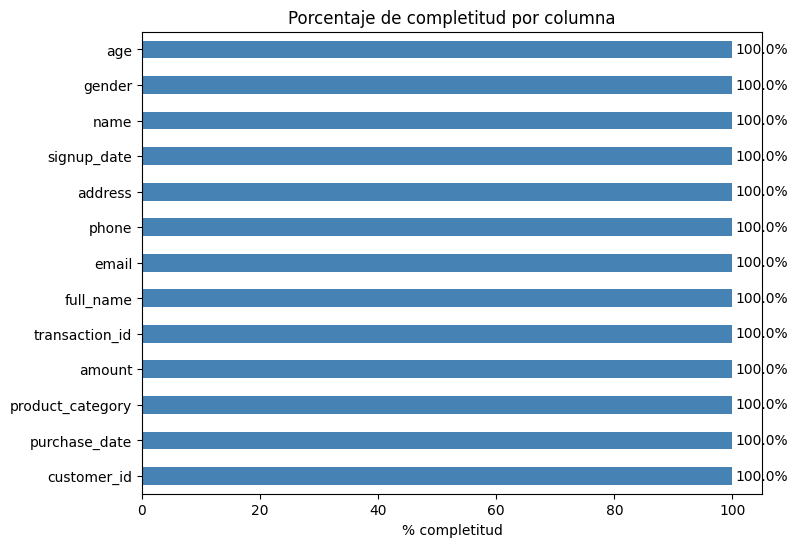

In [3]:
# % de completitud por columna
completitud = df.notna().mean() * 100

# Ordenar de menor a mayor
completitud = completitud.sort_values()

plt.figure(figsize=(8,6))
completitud.plot(kind="barh", color="steelblue")
plt.title("Porcentaje de completitud por columna")
plt.xlabel("% completitud")

# Etiquetas al final de cada barra
for i, v in enumerate(completitud.values):
    plt.text(v + 0.5, i, f"{v:.1f}%", va="center")

plt.show()


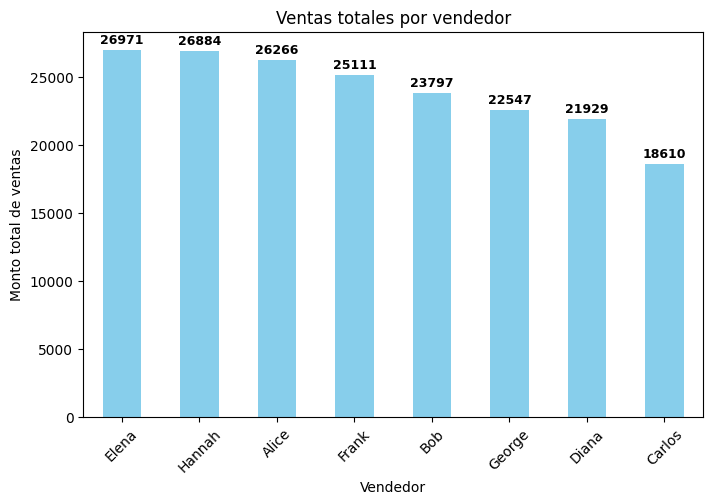

In [4]:
# Asegurar que amount sea numérico para los cálculos
df["amount_num"] = pd.to_numeric(df["amount"], errors="coerce").fillna(0)

# Ventas totales por vendedor
ventas_por_vendedor = df.groupby("name")["amount_num"].sum().sort_values(ascending=False)

ax = ventas_por_vendedor.plot(kind="bar", figsize=(8,5), color="skyblue")
plt.title("Ventas totales por vendedor")
plt.ylabel("Monto total de ventas")
plt.xlabel("Vendedor")
plt.xticks(rotation=45)

for i, v in enumerate(ventas_por_vendedor):
    plt.text(i, v + (max(ventas_por_vendedor) * 0.01), f"{int(v)}",
             ha="center", va="bottom", fontsize=9, fontweight="bold")

plt.show()

/tmp/ipykernel_2551/4256170493.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["signup_date"] = pd.to_datetime(df["signup_date"], errors="coerce")


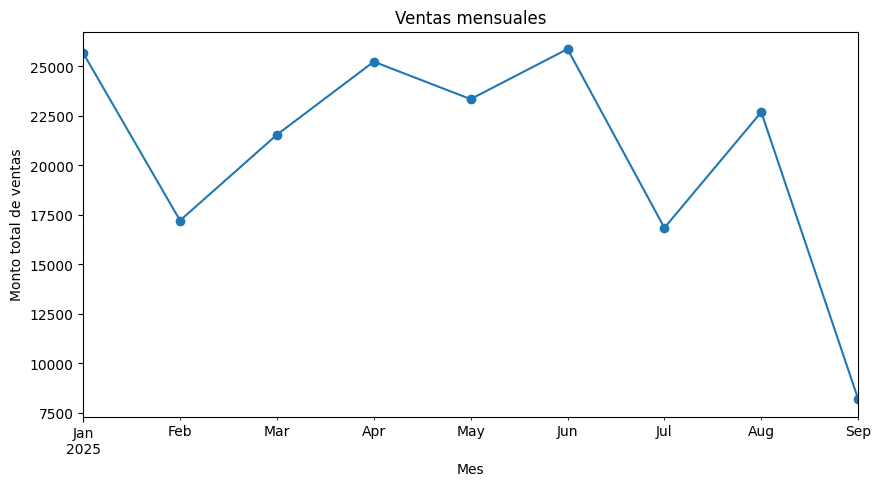

In [5]:
# Convertir fechas
df["purchase_date"] = pd.to_datetime(df["purchase_date"], errors="coerce")
df["signup_date"] = pd.to_datetime(df["signup_date"], errors="coerce")

# Ventas mensuales
ventas_mensuales = df.groupby(df["purchase_date"].dt.to_period("M"))["amount_num"].sum()

ventas_mensuales.plot(kind="line", marker="o", figsize=(10,5))
plt.title("Ventas mensuales")
plt.xlabel("Mes")
plt.ylabel("Monto total de ventas")
plt.show()

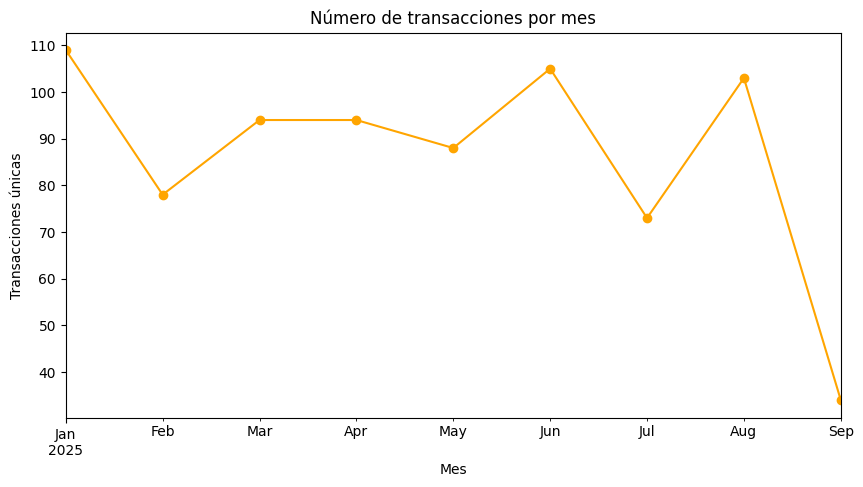

In [6]:
# Número de transacciones por mes
transacciones_mes = df.groupby(df["purchase_date"].dt.to_period("M"))["transaction_id"].nunique()

transacciones_mes.plot(kind="line", marker="o", color="orange", figsize=(10,5))
plt.title("Número de transacciones por mes")
plt.xlabel("Mes")
plt.ylabel("Transacciones únicas")
plt.show()

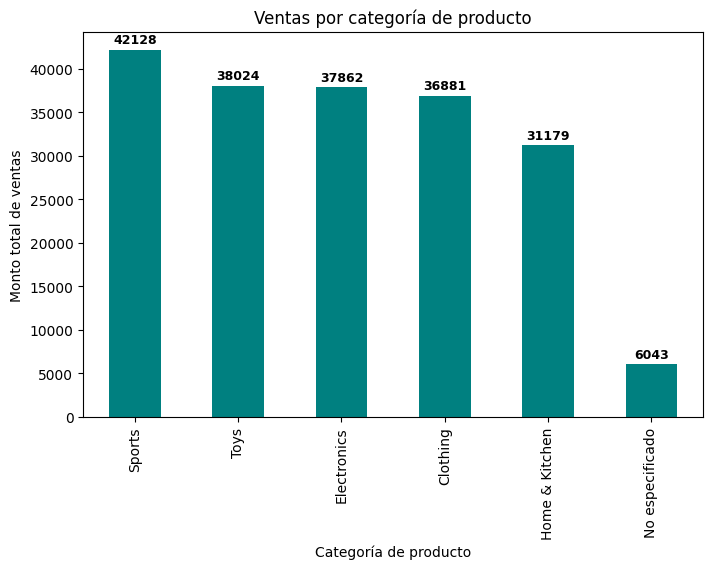

In [7]:
# Ventas por categoría de producto
ventas_categoria = df.groupby("product_category")["amount_num"].sum().sort_values(ascending=False)

ax = ventas_categoria.plot(kind="bar", figsize=(8,5), color="teal")
plt.title("Ventas por categoría de producto")
plt.ylabel("Monto total de ventas")
plt.xlabel("Categoría de producto")

for i, v in enumerate(ventas_categoria):
    plt.text(i, v + (max(ventas_categoria) * 0.01), f"{int(v)}", 
             ha="center", va="bottom", fontsize=9, fontweight="bold")

plt.show()


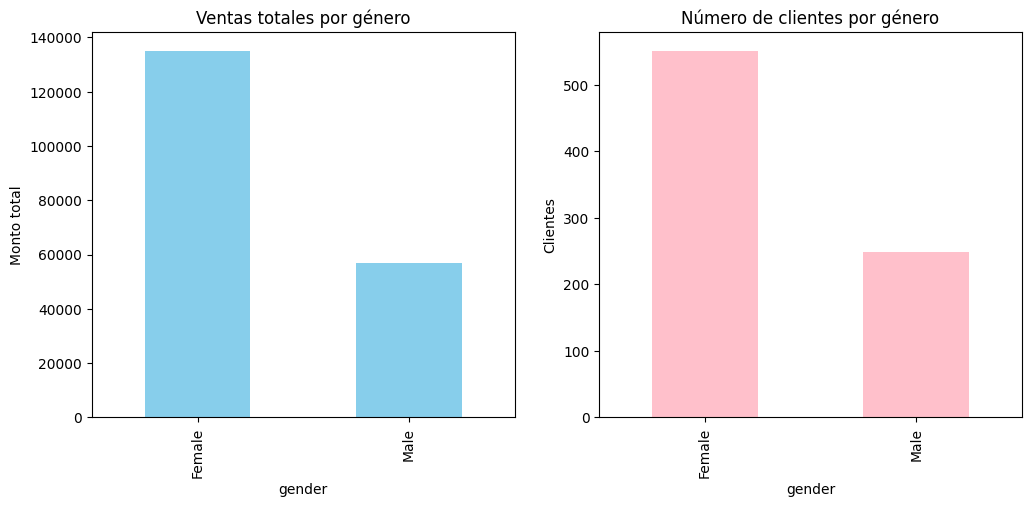

In [8]:
# Ventas y número de clientes por género
ventas_genero = df.groupby("gender")["amount_num"].sum()
clientes_genero = df.groupby("gender")["customer_id"].nunique()

fig, ax = plt.subplots(1,2, figsize=(12,5))
ventas_genero.plot(kind="bar", ax=ax[0], color="skyblue")
ax[0].set_title("Ventas totales por género")
ax[0].set_ylabel("Monto total")

clientes_genero.plot(kind="bar", ax=ax[1], color="pink")
ax[1].set_title("Número de clientes por género")
ax[1].set_ylabel("Clientes")
plt.show()


/tmp/ipykernel_2551/1885266602.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedio_rango = df.groupby("edad_rango")["amount_num"].mean()


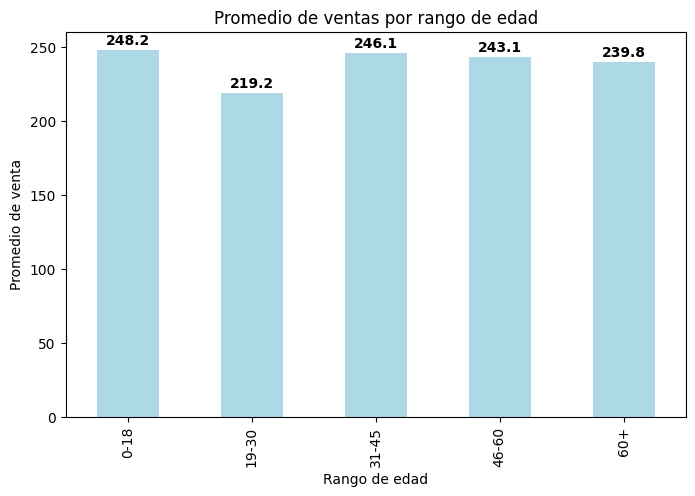

In [9]:
# Promedio de ventas por rango de edad
bins = [0,18,30,45,60,120]
labels = ["0-18","19-30","31-45","46-60","60+"]
df["edad_rango"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)

promedio_rango = df.groupby("edad_rango")["amount_num"].mean()

ax = promedio_rango.plot(kind="bar", color="lightblue", figsize=(8,5))
plt.title("Promedio de ventas por rango de edad")
plt.xlabel("Rango de edad")
plt.ylabel("Promedio de venta")

# 🔑 Agregar etiquetas encima de cada barra
for i, v in enumerate(promedio_rango):
    plt.text(i, v + 2, f"{v:.1f}", ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.show()


/tmp/ipykernel_2551/3436470362.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ventas_rango = df.groupby("edad_rango")["amount_num"].sum()


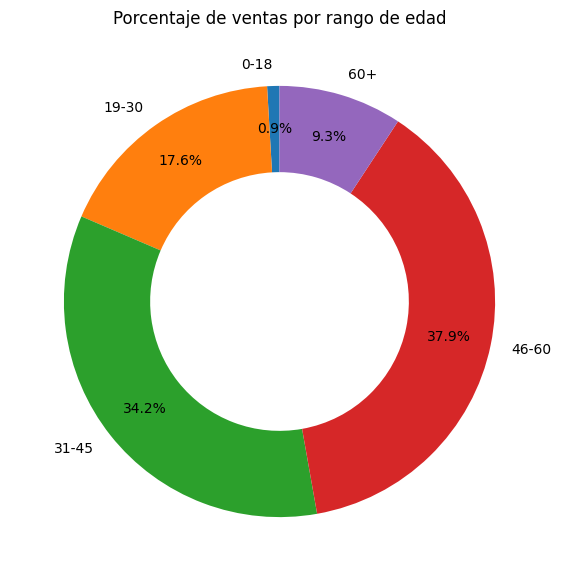

In [10]:
# Ventas totales por rango de edad
ventas_rango = df.groupby("edad_rango")["amount_num"].sum()

# Gráfico tipo dona
plt.figure(figsize=(7,7))
plt.pie(
    ventas_rango, 
    labels=ventas_rango.index, 
    autopct='%1.1f%%', 
    startangle=90,
    wedgeprops=dict(width=0.4),   # efecto de dona
    pctdistance=0.8               # distancia de los porcentajes
)
plt.title("Porcentaje de ventas por rango de edad")
plt.show()

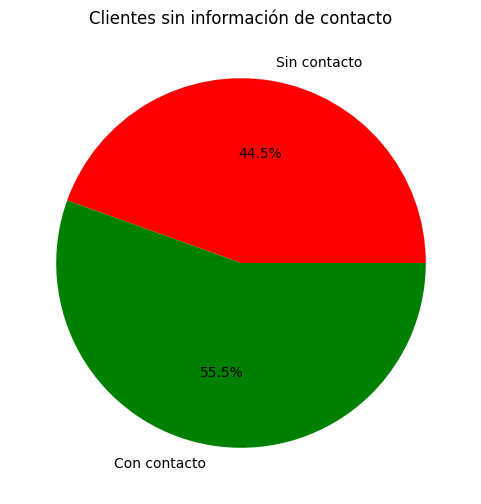

In [11]:
# Clientes sin información de contacto
sin_contacto = df[(df["email"]=="No especificado") | 
                  (df["phone"]=="No especificado") | 
                  (df["address"]=="No especificado")]["customer_id"].nunique()

plt.figure(figsize=(6,6))
plt.pie([sin_contacto, df["customer_id"].nunique()-sin_contacto], 
        labels=["Sin contacto","Con contacto"], autopct="%1.1f%%", colors=["red","green"])
plt.title("Clientes sin información de contacto")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=171bad0a-62a2-42cc-9180-d14c0a1c4c1a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>